

































# In this notebook we will explore the ODIR dataset. 
Link to dataset: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k?resource=download&select=full_df.csv

Basic questions we are going to explore:
- What are the total number of rows and columns?
- How many fundus images are normal?
- What is the count of multi disease fundus images?
- What is the count of each disease?
- What are the different image size?
- Are there any duplicates?

In [1]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy

In [2]:
df = pd.read_excel("E:/odir-dataset/ODIR-5K/ODIR-5K/data.xlsx")

In [3]:
df.head(15)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [4]:
df.tail(15)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3485,4671,48,Male,4671_left.jpg,4671_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3486,4672,65,Male,4672_left.jpg,4672_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3487,4673,85,Male,4673_left.jpg,4673_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3488,4675,53,Male,4675_left.jpg,4675_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3489,4676,55,Male,4676_left.jpg,4676_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3490,4677,38,Male,4677_left.jpg,4677_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3491,4678,54,Male,4678_left.jpg,4678_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3492,4679,69,Male,4679_left.jpg,4679_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3493,4682,45,Male,4682_left.jpg,4682_right.jpg,mild nonproliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3494,4683,58,Male,4683_left.jpg,4683_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


**We can see that the data does not label the both eyes correctly. For example if a person's left eye is normal and the right eye has cataract, it will show the person has cataract. 
We don't want this behavior in our dataset. We want to label each image correctly. We will do this at a later stage but first lets see what more this raw data has for us.**

In [5]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2218.233143,57.854000,0.325714,0.322286,0.061429,0.060571,0.046857,0.029429,0.049714,0.279714
std,1415.437872,11.724064,0.468708,0.467419,0.240149,0.238577,0.211363,0.169029,0.217385,0.448923
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2372.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3247.250000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['Patient Sex'].value_counts()

Male      1885
Female    1615
Name: Patient Sex, dtype: int64

In [7]:
df.shape

(3500, 15)

Here we observe that: 
- The total count is 3,500 records (rows).
- Columns = 15
- The average age of the patient is 57.854.
- The minimum age is 1 and the maximum age is 91.

In [8]:
one_count = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].apply(lambda x : x.sum())
one_count

N    1140
D    1128
G     215
C     212
A     164
H     103
M     174
O     979
dtype: int64

<AxesSubplot:title={'center':'Number of labels for each disease'}, xlabel='Disease label', ylabel='Count'>

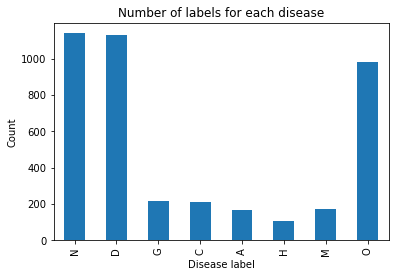

In [9]:
one_count.plot(kind='bar', stacked=True, xlabel='Disease label', ylabel='Count', title='Number of labels for each disease')

<AxesSubplot:title={'center':'Number of labels for each disease'}, ylabel='None'>

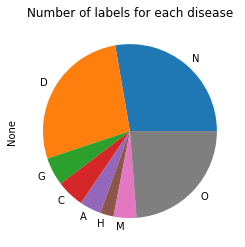

In [10]:
one_count.plot(kind='pie', stacked=True, title='Number of labels for each disease')

**We can observe that the dataset is not evenly distibuted. It has more number of samples for normal, diabetic and other diseases.**

In [11]:
imsize_df = pd.DataFrame()
imsize_df['Image Size'] = None
imsize_df

,Image Size


In [12]:
import os

In [13]:
for i in df['ID']:
    image_path = f'E:/odir-dataset/ODIR-5K/ODIR-5K/Training Images/{i}_left.jpg'
    image_size = os.path.getsize(image_path)
    # Update the image size in the DataFrame
    imsize_df.at[i, "Image Size"] = image_size

In [14]:
for i in df['ID']:
    image_path = f'E:/odir-dataset/ODIR-5K/ODIR-5K/Training Images/{i}_right.jpg'
    image_size = os.path.getsize(image_path)
    # Update the image size in the DataFrame
    imsize_df.at[4784+i, "Image Size"] = image_size

In [15]:
imsize_df.tail()

,Image Size
9470,179921
9472,147053
9473,150212
9474,77461
9568,289668


In [16]:
imsize_df['Image Size'].mean()

203641.97356765252

In [17]:
imsize_df.head()

,Image Size
0,131181
1,342179
2,184476
3,9706
4,81401


In [18]:
imsize_df['Image Size'].describe()

count       6999
unique      6878
top       126042
freq           3
Name: Image Size, dtype: int64

We can observe that image size varies a lot and has lot of unique values.

In [20]:
df['Left-Diagnostic Keywords'].value_counts()

normal fundus                                                1433
moderate non proliferative retinopathy                        366
mild nonproliferative retinopathy                             220
cataract                                                      135
pathological myopia                                           111
                                                             ... 
lens dust，myelinated nerve fibers                               1
laser spot，white vessel                                         1
mild nonproliferative retinopathy，retinal pigmentation          1
mild nonproliferative retinopathy，lens dust，drusen              1
hypertensive retinopathy，age-related macular degeneration       1
Name: Left-Diagnostic Keywords, Length: 227, dtype: int64

In [21]:
df['Right-Diagnostic Keywords'].value_counts()

normal fundus                                                      1383
moderate non proliferative retinopathy                              379
mild nonproliferative retinopathy                                   240
cataract                                                            127
pathological myopia                                                 116
                                                                   ... 
hypertensive retinopathy，suspected diabetic retinopathy               1
glial remnants anterior to the optic disc                             1
moderate non proliferative retinopathy，atrophic change                1
hypertensive retinopathy，moderate non proliferative retinopathy       1
hypertensive retinopathy，age-related macular degeneration             1
Name: Right-Diagnostic Keywords, Length: 233, dtype: int64

In [22]:
def find_unique_keyword(data):
    # Initialise empty set
    # Iterate over each row
    # Get the string
    # Strip the spaces
    # Separate each row from a column
    # add values to a set
    all_diseases = set()
    for diseases in data:
        diseases = diseases.strip()
        diseases = diseases.split('，')
        for disease in diseases:
            all_diseases.add(disease)
    return all_diseases

In [23]:
left_eye_diseases = find_unique_keyword(df['Left-Diagnostic Keywords'])
left_eye_diseases

{'age-related macular degeneration',
 'anterior segment image',
 'arteriosclerosis',
 'asteroid hyalosis',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal vein occlusion',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'choroidal nevus',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'hypertensive retinopathy',
 'hypertensive retinopathy,diabetic retinopathy',
 'idiopathic choroidal neovascularization',
 'image offset',
 'intraretinal hemorrhage',
 'laser spot',
 'lens dust',
 'low image quality',
 'low image quality,maculopathy',
 'macular coloboma',
 'macular epiretinal membrane',
 'macular hole',
 'macul

In [24]:
right_eye_diseases = find_unique_keyword(df['Right-Diagnostic Keywords'])
right_eye_diseases

{'abnormal pigment',
 'age-related macular degeneration',
 'anterior segment image',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'central retinal vein occlusion',
 'central serous chorioretinopathy',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'congenital choroidal coloboma',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'glial remnants anterior to the optic disc',
 'hypertensive retinopathy',
 'idiopathic choroidal neovascularization',
 'intraretinal microvascular abnormality',
 'laser spot',
 'lens dust',
 'low image quality',
 'macular epiretinal membrane',
 'maculopathy',
 'mild nonproliferative retinopathy',
 'moderate non proliferativ

In [25]:
len(left_eye_diseases), len(right_eye_diseases)

(82, 84)

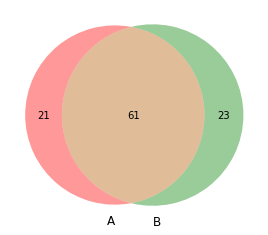

In [26]:
from matplotlib_venn import venn2
venn2([left_eye_diseases, right_eye_diseases])

In [27]:
intersection_diseases = left_eye_diseases.intersection(right_eye_diseases)
intersection_diseases

{'age-related macular degeneration',
 'anterior segment image',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal vein occlusion',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'hypertensive retinopathy',
 'idiopathic choroidal neovascularization',
 'laser spot',
 'lens dust',
 'low image quality',
 'macular epiretinal membrane',
 'maculopathy',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'myopia retinopathy',
 'myopic maculopathy',
 'myopic retinopathy',
 'normal fundus',
 'old branch retinal vein occlusion',
 'old central retinal vein occlusion',
 'old chor

In [28]:
left_eye_diseases.difference(right_eye_diseases)

{'arteriosclerosis',
 'asteroid hyalosis',
 'choroidal nevus',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'hypertensive retinopathy,diabetic retinopathy',
 'image offset',
 'intraretinal hemorrhage',
 'low image quality,maculopathy',
 'macular coloboma',
 'macular hole',
 'macular pigmentation disorder',
 'no fundus image',
 'old choroiditis',
 'optic disk epiretinal membrane',
 'retinal pigment epithelium atrophy',
 'rhegmatogenous retinal detachment',
 'silicone oil eye',
 'suspected moderate non proliferative retinopathy',
 'suspected retinal vascular sheathing',
 'wedge white line change'}

In [29]:
len(left_eye_diseases.difference(right_eye_diseases))

21

In [30]:
right_eye_diseases.difference(left_eye_diseases)

{'abnormal pigment',
 'central retinal artery occlusion',
 'central serous chorioretinopathy',
 'congenital choroidal coloboma',
 'glial remnants anterior to the optic disc',
 'intraretinal microvascular abnormality',
 'morning glory syndrome',
 'optic discitis',
 'oval yellow-white atrophy',
 'pigmentation disorder',
 'post laser photocoagulation,diabetic retinopathy,maculopathy',
 'retinal artery macroaneurysm',
 'retinal detachment',
 'retinal pigment epithelial hypertrophy',
 'retinal vascular sheathing',
 'suspected abnormal color of  optic disc',
 'suspected cataract',
 'suspected macular epimacular membrane',
 'suspected microvascular anomalies',
 'suspected retinitis pigmentosa',
 'vascular loops',
 'vitreous opacity',
 'wedge-shaped change'}

In [31]:
disease_union = left_eye_diseases.union(right_eye_diseases)
disease_union

{'abnormal pigment',
 'age-related macular degeneration',
 'anterior segment image',
 'arteriosclerosis',
 'asteroid hyalosis',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'central retinal vein occlusion',
 'central serous chorioretinopathy',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'choroidal nevus',
 'congenital choroidal coloboma',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'glial remnants anterior to the optic disc',
 'hypertensive retinopathy',
 'hypertensive retinopathy,diabetic retinopathy',
 'idiopathic choroidal neovascularization',
 'image offset',
 'intraretinal 

In [32]:
len(disease_union)

105

In [33]:
df[df['D'] == 1].head(15)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
11,11,60,Female,11_left.jpg,11_right.jpg,moderate non proliferative retinopathy，hyperte...,moderate non proliferative retinopathy，hyperte...,0,1,0,0,0,1,0,0
19,19,45,Male,19_left.jpg,19_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
22,22,55,Female,22_left.jpg,22_right.jpg,moderate non proliferative retinopathy，laser spot,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
26,26,63,Female,26_left.jpg,26_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy，abnorma...,0,1,0,0,0,0,0,1
27,27,33,Male,27_left.jpg,27_right.jpg,normal fundus,macular epiretinal membrane，moderate non proli...,0,1,0,0,0,0,0,1


In [34]:
diabetic_df = df[(df['D'] == 1)]
diabetic_keywords = find_unique_keyword(diabetic_df['Left-Diagnostic Keywords'])
diabetic_keywords


{'anterior segment image',
 'atrophic change',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal vein occlusion',
 'chorioretinal atrophy',
 'diabetic retinopathy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'glaucoma',
 'hypertensive retinopathy',
 'hypertensive retinopathy,diabetic retinopathy',
 'laser spot',
 'lens dust',
 'low image quality',
 'macular epiretinal membrane',
 'macular pigmentation disorder',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'myopia retinopathy',
 'no fundus image',
 'normal fundus',
 'old choroiditis',
 'optic disc edema',
 'optic disk epiretinal membrane',
 'optic disk photographically invisible',
 'pathological myopia',
 'post laser photocoagulation',
 'post retinal laser surgery',
 'proliferative diabetic retinopathy',
 'refractive media opacity',
 'retina fold',
 'retinal pigment epithelium atrophy

In [35]:
len(diabetic_keywords)

48

#### What ratio of data has multiple disease? (Try pivot tables)

In [36]:
# We need to find the number of persons having multiple diseases.